<a href="https://colab.research.google.com/github/vishymails/Cyber_security_AIML_june2024/blob/main/cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to use models


In [1]:
from random import random

In [4]:
time_series = [2 * x + random() for x in range(1, 100)]

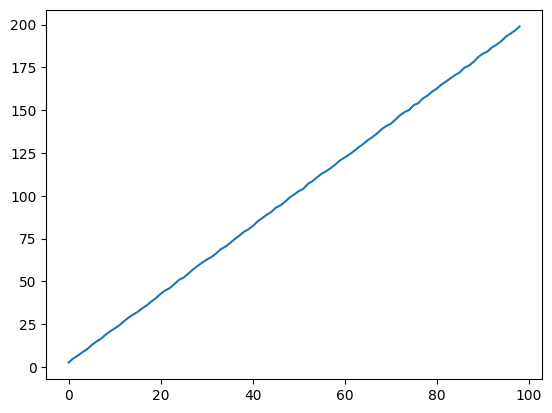

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time_series)
plt.show()

In [9]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(time_series, 12)
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[200.66332869]


In [12]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order = (1, 0, 0))
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[198.8414094]


In [13]:
model_fit.summary

<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x78b0db2353f0>>

In [14]:
model_fit.params

array([100.54655227,   0.99978029,   4.16922355])

In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -215.013
Date:                Tue, 04 Jun 2024   AIC                            436.027
Time:                        06:24:02   BIC                            443.812
Sample:                             0   HQIC                           439.177
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.5466     96.781      1.039      0.299     -89.141     290.234
ar.L1          0.9998      0.004    272.074      0.000       0.993       1.007
sigma2         4.1692      2.179      1.914      0.056      -0.101       8.439
===================================================================================
Ljung-Box (L1) (Q):                   6.53   Jarque-Bera (JB):              2327.94
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -3.42
Prob(H) (two-sided):                  0.81   Kurtosis:                        25.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Anomally Detection with Isolation Forest


In [16]:
import numpy as np
import pandas as pd

random_seed = np.random.RandomState(12)

In [17]:
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3 , X_train]

X_train = pd.DataFrame(X_train, columns = ['x', 'y'])

X_train.head()

,x,y
0,3.236493,2.659287
1,3.121220,2.149632
2,3.376571,2.232639
3,3.002564,2.939886
4,2.596509,4.435910


In [18]:
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3 , X_test]

X_test = pd.DataFrame(X_test, columns = ['x', 'y'])

X_test.head()

,x,y
0,3.944575,3.866919
1,2.984853,3.142150
2,3.501735,2.168262
3,2.906300,3.233826
4,3.273225,3.261790


In [19]:
X_outliers = random_seed.uniform(low = -5, high = 5, size = (50, 2))

X_outliers = pd.DataFrame(X_outliers, columns = ['x', 'y'])

X_outliers.head()

,x,y
0,3.947504,2.891003
1,0.413976,-2.025841
2,-2.644476,-3.480783
3,-0.518212,-3.386443
4,2.977669,2.215355


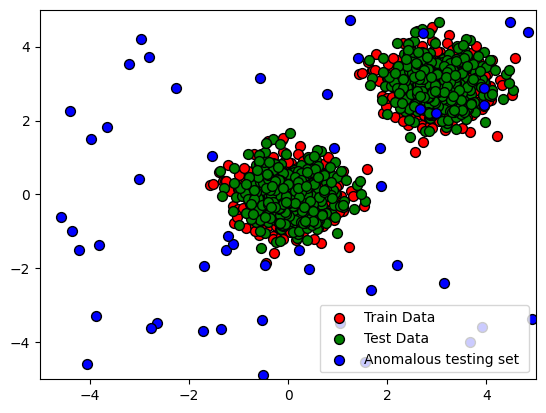

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train['x'], X_train['y'], c = "red", s = 50, edgecolor = "k")
p2 = plt.scatter(X_test['x'], X_test['y'], c = "green", s = 50, edgecolor = "k")
p3 = plt.scatter(X_outliers['x'], X_outliers['y'], c = "blue", s = 50, edgecolor = "k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.legend([p1, p2, p3], ['Train Data ', 'Test Data ', 'Anomalous testing set '], loc = "lower right")
plt.show()

In [26]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()

clf.fit(X_train)

y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

y_outliers_pred = clf.predict(X_outliers)



In [28]:
X_outliers = X_outliers.assign(pred = y_outliers_pred)

X_outliers.head()

,x,y,pred
0,3.947504,2.891003,-1
1,0.413976,-2.025841,-1
2,-2.644476,-3.480783,-1
3,-0.518212,-3.386443,-1
4,2.977669,2.215355,1


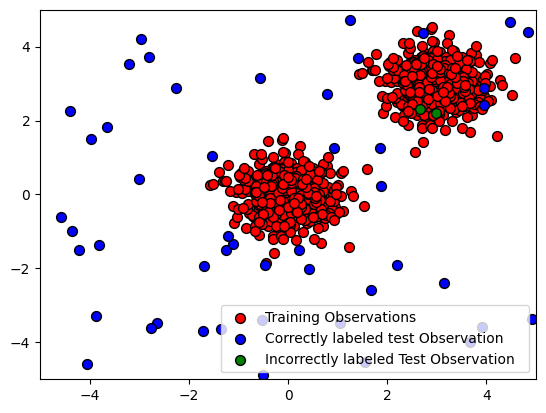

In [32]:

p1 = plt.scatter(X_train['x'], X_train['y'], c = "red", s = 50, edgecolor = "k")
p2 = plt.scatter(X_outliers.loc[X_outliers.pred == -1, ['x']], X_outliers.loc[X_outliers.pred == -1, ['y']], c = "blue", s = 50, edgecolor = "k")
p3 = plt.scatter(X_outliers.loc[X_outliers.pred == 1, ['x']], X_outliers.loc[X_outliers.pred == 1, ['y']], c = "green", s = 50, edgecolor = "k")


plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.legend([p1, p2, p3], ['Training Observations ', 'Correctly labeled test Observation ', 'Incorrectly labeled Test Observation  '], loc = "lower right")
plt.show()

Standardizing your data

In [33]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/vishymails/Cyber_security_AIML_june2024/main/file_pe_headers.csv", sep=",")

data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [36]:
import pandas as pd

data = pd.read_csv("file_pe_headers.csv", sep=",")

data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [38]:
X = data.drop(["Name", "Malware"], axis=1).to_numpy()

X

array([[2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 7.78240e+04,
        7.37280e+04, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 2.94912e+05,
        0.00000e+00, 3.46112e+05],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 4.09600e+04,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.31170e+04, 0.00000e+00, 0.00000e+00, ..., 6.14400e+04,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 1.02400e+05,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 5.57056e+05,
        0.00000e+00, 0.00000e+00]])

In [39]:
from sklearn.preprocessing import StandardScaler

X_standardized = StandardScaler()

X_standardized = X_standardized.fit_transform(X)

print(X_standardized)

[[ 0.         -0.03506542 -0.04751096 ... -0.07054894 -0.0198525
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ... -0.03849221 -0.02110877
  -0.02469983]
 [ 0.         -0.03506542 -0.04751096 ... -0.07599254 -0.02110877
  -0.04066791]
 ...
 [ 0.         -0.18093613 -0.04958686 ... -0.07296832 -0.02110877
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ... -0.06691988 -0.02110877
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ...  0.00021781 -0.02110877
  -0.04066791]]


In [40]:
data.shape


(19611, 79)

In [42]:
X.shape

(19611, 77)

In [41]:
data.describe()

<bound method NDFrame.describe of                                               Name  e_magic  e_cblp  e_cp  \
0      VirusShare_a878ba26000edaac5c98eff4432723b3    23117     144     3   
1      VirusShare_ef9130570fddc174b312b2047f5f4cf0    23117     144     3   
2      VirusShare_ef84cdeba22be72a69b198213dada81a    23117     144     3   
3      VirusShare_6bf3608e60ebc16cbcff6ed5467d469e    23117     144     3   
4      VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb    23117     144     3   
...                                            ...      ...     ...   ...   
19606                                     clip.exe    23117     144     3   
19607                 VNC-Server-6.2.0-Windows.exe    23117     144     3   
19608      Microsoft.GroupPolicy.Management.ni.dll    23117       0     0   
19609                            cryptuiwizard.dll    23117     144     3   
19610                                  winhttp.dll    23117     144     3   

       e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  ...  \
0           0          4           0       65535     0   184  ...   
1           0          4           0       65535     0   184  ...   
2           0          4           0       65535     0   184  ...   
3           0          4           0       65535     0   184  ...   
4           0          4           0       65535     0   184  ...   
...       ...        ...         ...         ...   ...   ...  ...   
19606       0          4           0       65535     0   184  ...   
19607       0          4           0       65535     0   184  ...   
19608       0          0           0           0     0     0  ...   
19609       0          4           0       65535     0   184  ...   
19610       0          4           0       65535     0   184  ...   

       SectionMaxChar  SectionMainChar  DirectoryEntryImport  \
0          3758096608                0                     7   
1          3791650880                0                    16   
2          3221225536                0                     6   
3          3224371328                0                     8   
4          3227516992                0                     2   
...               ...              ...                   ...   
19606      3221225536                0                     8   
19607      3221225536                0                    10   
19608      3758096448                0                     0   
19609      3221225536                0                    12   
19610      3221225536                0                    35   

       DirectoryEntryImportSize  DirectoryEntryExport  \
0                           152                     0   
1                           311                     0   
2                           176                     0   
3                           155                     0   
4                            43                     0   
...                         ...                   ...   
19606                        85                     0   
19607                       391                     0   
19608                         0                     0   
19609                       162                     8   
19610                       226                    58   

       ImageDirectoryEntryExport  ImageDirectoryEntryImport  \
0                              0                      54440   
1                              0                     262276   
2                              0                      36864   
3                              0                     356352   
4                              0                      61440   
...                          ...                        ...   
19606                          0                      24948   
19607                          0                    1413420   
19608                          0                          0   
19609                      89008                      94904   
19610                       8348                     545812   

 

In [43]:
data.shape

(19611, 79)

In [44]:
data.drop(["Name", "Malware"], axis=1, inplace=True)



In [45]:
data.shape

(19611, 77)

Training an XGBoost Classifier for faster performance

In [46]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/vishymails/Cyber_security_AIML_june2024/main/file_pe_headers.csv", sep=",")

df.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [47]:
y = df["Malware"]

y.head()

0    1
1    1
2    1
3    1
4    1
Name: Malware, dtype: int64

In [48]:
X = df.drop(["Name", "Malware"], axis=1).to_numpy()

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [50]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
y_test_pred = model.predict(X_test)

y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [55]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy : %.2f%%" % (accuracy * 100))

Accuracy : 99.18%
